In [ ]:
path_train ="/content/drive/MyDrive/Colab Notebooks/UTEC - IA/data/data_flores.csv"


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = np.genfromtxt(path_train, delimiter=',')

In [ ]:
x = data[:100,[0, 1, 2, 3]]
y = np.array([int(i>=50) for i in range(x.shape[0])])
y.shape = (len(y),1)

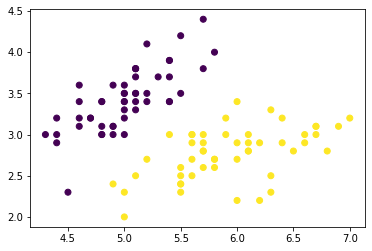

In [ ]:
plt.scatter(x[:,0],x[:,1], c = y)
plt.show()

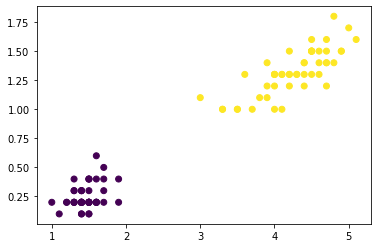

In [ ]:
plt.scatter(x[:,2],x[:,3], c = y)
plt.show()

In [ ]:
def getSetTraining(x, y):
  index = np.arange(0, len(y), step = 1)
  index_limit = int(.7*len(index))
  np.random.shuffle(index)
  index_train, index_test = index[:index_limit], index[index_limit:]
  index_train = np.sort(index_train)
  index_test = np.sort(index_test)  
  return x[index_train,:], x[index_test,:],y[index_train,:], y[index_test,:]
x_train, x_test, y_train, y_test = getSetTraining(x, y)

In [ ]:
def s(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
def h(x, w):
  return s(x @ w)

In [ ]:
def error(x, y, w):
  return np.mean(-y * np.log(h(x, w)- (1 - y)*np.log(1-h(x, w))))

In [ ]:
def gradient(x, y, w):
  return (x.T @ (h(x, w)- y)) / len(y)

In [ ]:
# rescaling X
def rescaling(x):
  ones = np.ones(len(x))
  return np.c_[ones, x]

In [ ]:
iter = 10**5
w = np.zeros(shape = (5, 1))
lr = 0.01
list_error = []
while iter:
  iter -= 1
  w -= lr * gradient(rescaling(x_train), y_train, w)
  list_error.append(error(rescaling(x_train), y_train, w))


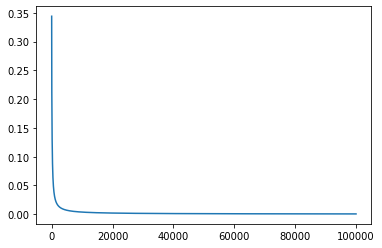

In [ ]:
plt.plot(list_error)
plt.show()

In [ ]:
def confusion_matrix():
  threshold = .5
  true_positives = 0
  true_negatives = 0
  false_positives = 0
  false_negatives = 0
  for i in range(x_test.shape[0]):
    y_pred = h(rescaling(x_test[i:i+1,:]), w)  
    if int(y_pred>=threshold) == 1 and y_test[i] == 1 :
      true_positives += 1
    elif int(y_pred>=threshold) == 0 and y_test[i] == 1 :
      true_negatives += 1
    elif int(y_pred>=threshold) == 1 and y_test[i] == 0 :
      false_positives += 1
    else:
      false_negatives += 1
  return true_positives,true_negatives,false_positives,false_negatives

In [ ]:
true_positives,true_negatives,false_positives,false_negatives = confusion_matrix()
true_positives,true_negatives,false_positives,false_negatives

(14, 0, 0, 16)

|Predicción/Real| Versicolor   | Setosa  |
| :------------- | :----------: | -----------: |
| Versicolor | 14   | 0    |
| Setosa | 0 | 16  |

**Multinomial Logistic Regression - Naive Approach**

In [ ]:
xmul = data[:,[0, 1, 2, 3]]
ymul = np.array([i//50 for i in range(x_mul.shape[0])])

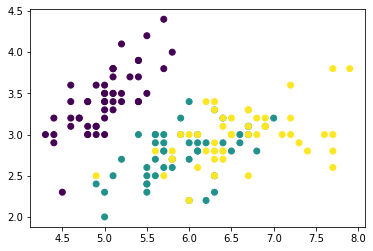

In [ ]:
plt.scatter(xmul[:,0], xmul[:,1], c = ymul)

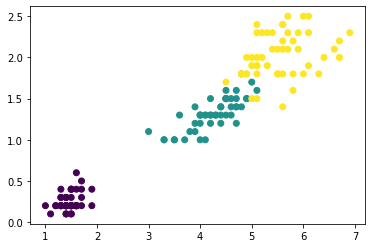

In [ ]:
plt.scatter(xmul[:,2], xmul[:,3], c = ymul)

In [ ]:
xmul = data[:,[0, 1, 2, 3]]
ymul_seto = np.array([int(i>=50) for i in range(xmul.shape[0])])
ymul_vers = np.array([int(i<50 or i>=100) for i in range(xmul.shape[0])])
ymul_virg = np.array([int(i<100) for i in range(xmul.shape[0])])
ymul_seto.shape = (len(ymul_seto),1)
ymul_vers.shape = (len(ymul_vers),1)
ymul_virg.shape = (len(ymul_virg),1)
print(*ymul_virg)

[1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0]


In [ ]:
x_train_seto, x_test_seto, y_train_seto, y_test_seto = getSetTraining(xmul, ymul_seto)
x_train_vers, x_test_vers, y_train_vers, y_test_vers = getSetTraining(xmul, ymul_vers)
x_train_virg, x_test_virg, y_train_virg, y_test_virg = getSetTraining(xmul, ymul_virg)

In [ ]:
iter = 10**5
w_seto = np.zeros(shape = (5, 1))
w_vers = np.zeros(shape = (5, 1))
w_virg = np.zeros(shape = (5, 1))
lr = 0.01
list_error_seto = []
list_error_vers = []
list_error_virg = []
while iter:
  iter -= 1
  w_seto -= lr * gradient(rescaling(x_train_seto), y_train_seto, w_seto)
  w_vers -= lr * gradient(rescaling(x_train_vers), y_train_vers, w_vers)
  w_virg -= lr * gradient(rescaling(x_train_virg), y_train_virg, w_virg)
  list_error_seto.append(error(rescaling(x_train_seto), y_train_seto, w_seto))
  list_error_vers.append(error(rescaling(x_train_vers), y_train_vers, w_vers))
  list_error_virg.append(error(rescaling(x_train_virg), y_train_virg, w_virg))
  print("Error: Setosa",list_error_seto[-1], " // Error: Versicular",list_error_vers[-1], " // Error: Virginica",list_error_virg[-1])

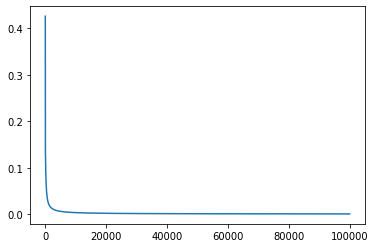

In [ ]:
plt.plot(list_error_seto)

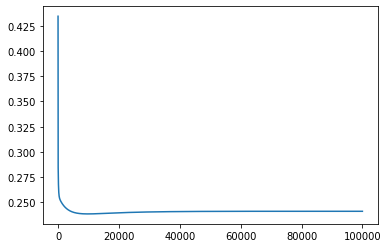

In [ ]:
plt.plot(list_error_vers)

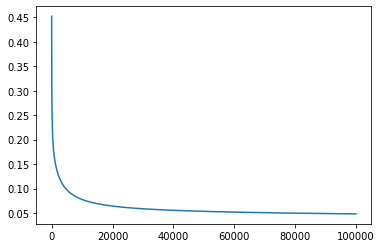

In [ ]:
plt.plot(list_error_virg)

In [ ]:
def confusion_matrix_multi(x, y, w, threshold = .5):
  true_positives = 0
  true_negatives = 0
  false_positives = 0
  false_negatives = 0
  for i in range(x.shape[0]):
    y_pred = h(rescaling(x[i:i+1,:]), w)  
    if int(y_pred>=threshold) == 1 and y[i] == 1 :
      true_positives += 1
    elif int(y_pred>=threshold) == 0 and y[i] == 1 :
      true_negatives += 1
    elif int(y_pred>=threshold) == 1 and y[i] == 0 :
      false_positives += 1
    else:
      false_negatives += 1
  return true_positives,true_negatives,false_positives,false_negatives

In [ ]:
true_positives_seto,true_negatives_seto,false_positives_seto,false_negatives_seto = confusion_matrix_multi(x_test_seto, y_test_seto, w_seto)
true_positives_seto,true_negatives_seto,false_positives_seto,false_negatives_seto

(25, 0, 0, 20)

In [ ]:
true_positives_vers,true_negatives_vers,false_positives_vers,false_negatives_vers = confusion_matrix_multi(x_test_vers, y_test_vers, w_vers,.41)
true_positives_vers,true_negatives_vers,false_positives_vers,false_negatives_vers

(27, 3, 6, 9)

In [ ]:
true_positives_virg,true_negatives_virg,false_positives_virg,false_negatives_virg = confusion_matrix_multi(x_test_virg, y_test_virg, w_virg)
true_positives_virg,true_negatives_virg,false_positives_virg,false_negatives_virg 

(28, 0, 0, 17)

In [ ]:
resul = np.c_[h(rescaling(x_test), w_seto),h(rescaling(x_test), w_vers), h(rescaling(x_test), w_virg)]
mini = np.min(resul, axis = 1)
cont = 0
for i in range(len(y_test)):
  #print(np.where(resul[i,:] == mini[i]), y_test[i])
  if np.where(resul[i,:] == mini[i]) == y_test[i]:
    cont += 1
cont, len(y_test)
#y_test

(30, 30)

**Multinomial Logistic Regression - Serious Approach $\rightarrow$ SoftMax** 

In [ ]:
def softmax(x):
  x_exp = np.exp(x[:,1:])
  return x_exp / np.sum(x_exp, axis = 1, keepdims=True)
  #x_exp = np.exp(x)
  #return x_exp / np.sum(x_exp, axis = 1, keepdims=True)

In [ ]:
def net(x, y, w):
  return softmax(x @ w)

In [ ]:
softmax(rescaling(x_test) @ w)

array([], shape=(30, 0), dtype=float64)

In [ ]:
#rescaling(x_test[0,:])#.shape
rescaling(x_test[:1,:])
#x_test

array([[1. , 5.1, 3.5, 1.4, 0.2]])